<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Описание-признаков" data-toc-modified-id="Описание-признаков-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание признаков</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек,-знакомство-с-данными" data-toc-modified-id="Импорт-библиотек,-знакомство-с-данными-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Импорт библиотек, знакомство с данными</a></span></li><li><span><a href="#Исследование-данных" data-toc-modified-id="Исследование-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Исследование данных</a></span></li><li><span><a href="#Избавление-от-ненужных-признаков" data-toc-modified-id="Избавление-от-ненужных-признаков-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Избавление от ненужных признаков</a></span></li></ul></li><li><span><a href="#Создание-выборок,-обучение-моделей" data-toc-modified-id="Создание-выборок,-обучение-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Создание выборок, обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Разбиение-на-выборки,-ОНЕ" data-toc-modified-id="Разбиение-на-выборки,-ОНЕ-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Разбиение на выборки, ОНЕ</a></span></li><li><span><a href="#Создание-и-обучение-моделей" data-toc-modified-id="Создание-и-обучение-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Создание и обучение моделей</a></span></li></ul></li><li><span><a href="#Тестирование-финальной-модели,-выводы" data-toc-modified-id="Тестирование-финальной-модели,-выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование финальной модели, выводы</a></span><ul class="toc-item"><li><span><a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Проверка модели на тестовой выборке</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Уточняющие-вопросы" data-toc-modified-id="Уточняющие-вопросы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Уточняющие вопросы</a></span></li><li><span><a href="#Цель-проекта" data-toc-modified-id="Цель-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Цель проекта</a></span></li></ul></div>

# Финальный спринт: домен Телеком
# «Прогнозирование оттока клиентов»
## Описание проекта
Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание данных
Данные состоят из файлов, полученных из разных источников:
* `contract_new.csv` — информация о договоре;
* `personal_new.csv` — персональные данные клиента;
* `internet_new.csv` — информация об интернет-услугах;
* `phone_new.csv` — информация об услугах телефонии.

### Описание признаков
* `BeginDate` – дата начала пользования услугами,
* `EndDate` – дата окончания пользования услугами (если она No - клиент не ушёл),
* `Type` – тип оплаты: ежемесячный, годовой и тд,
* `PaperlessBilling` – безналичный расчет,
* `PaymentMethod` – способ оплаты,
* `MonthlyCharges` – ежемесячные траты на услуги,
* `TotalCharges` – всего потрачено денег на услуги
* `Dependents` – наличие иждивенцев
* `Senior Citizen` – наличие пенсионного статуса по возрасту
* `Partner` – наличие супруга(и)
* `MultipleLines` – наличие возможности ведения параллельных линий во время
звонка

## Исследовательский анализ данных
### Импорт библиотек, знакомство с данными

In [1]:
!pip install -q phik
!pip install -U -q scikit-learn
!pip install -U -q matplotlib
!pip install -U -q seaborn

In [2]:
# импорты
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import phik
from phik.report import plot_correlation_matrix
from phik import report

# константы
RANDOM_STATE = 140823 # дата понедельника начала финального спринта
TEST_SIZE = 0.25 # размер тестовой выборки

In [3]:
try:
    data_contract = pd.read_csv('contract_new.csv', index_col=['customerID'], parse_dates=['BeginDate', 'EndDate'])
    data_personal = pd.read_csv('personal_new.csv', index_col='customerID')
    data_internet = pd.read_csv('internet_new.csv', index_col='customerID')
    data_phone = pd.read_csv('phone_new.csv', index_col='customerID')
except:
    data_contract = pd.read_csv('/datasets/contract_new.csv', index_col='customerID')
    data_personal = pd.read_csv('/datasets/personal_new.csv', index_col='customerID')
    data_internet = pd.read_csv('/datasets/internet_new.csv', index_col='customerID')
    data_phone = pd.read_csv('/datasets/phone_new.csv', index_col='customerID')

Столбец `customerID` содержит уникальный идентификатор пользователя, по которому можно объединять данные при необходимости. Поэтому можно сделать его индексом таблиц.

In [4]:
data = [data_contract, data_personal, data_internet, data_phone]

for d in data:
    display(d.head())
    display(d.info())

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   object        
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 440.2+ KB


None

,gender,SeniorCitizen,Partner,Dependents
customerID,,,,
7590-VHVEG,Female,0,Yes,No
5575-GNVDE,Male,0,No,No
3668-QPYBK,Male,0,No,No
7795-CFOCW,Male,0,No,No
9237-HQITU,Female,0,No,No


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7043 non-null   object
 1   SeniorCitizen  7043 non-null   int64 
 2   Partner        7043 non-null   object
 3   Dependents     7043 non-null   object
dtypes: int64(1), object(3)
memory usage: 275.1+ KB


None

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,
7590-VHVEG,DSL,No,Yes,No,No,No,No
5575-GNVDE,DSL,Yes,No,Yes,No,No,No
3668-QPYBK,DSL,Yes,Yes,No,No,No,No
7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
9237-HQITU,Fiber optic,No,No,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
Index: 5517 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   5517 non-null   object
 1   OnlineSecurity    5517 non-null   object
 2   OnlineBackup      5517 non-null   object
 3   DeviceProtection  5517 non-null   object
 4   TechSupport       5517 non-null   object
 5   StreamingTV       5517 non-null   object
 6   StreamingMovies   5517 non-null   object
dtypes: object(7)
memory usage: 344.8+ KB


None

,MultipleLines
customerID,
5575-GNVDE,No
3668-QPYBK,No
9237-HQITU,No
9305-CDSKC,Yes
1452-KIOVK,Yes


<class 'pandas.core.frame.DataFrame'>
Index: 6361 entries, 5575-GNVDE to 3186-AJIEK
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MultipleLines  6361 non-null   object
dtypes: object(1)
memory usage: 99.4+ KB


None

Пропусков в датасетах нет, но не во всех есть данные обо всех существующих пользователях (если датасеты объединять, пропуски появятся).
### Исследование данных

In [5]:
print('Начало датасета:', min(data_contract['BeginDate']))
print('Конец датасета:', max(data_contract['BeginDate']))
print('Конечные даты:', data_contract['EndDate'].value_counts())

Начало датасета: 2013-10-01 00:00:00
Конец датасета: 2020-02-01 00:00:00
Конечные даты: No            5942
2020-01-01      39
2019-12-01      38
2018-11-01      35
2019-09-01      32
              ... 
2015-04-01       2
2014-09-01       2
2014-06-01       1
2014-10-01       1
2014-11-01       1
Name: EndDate, Length: 67, dtype: int64


Датасет охватывает 7 лет с 2013 по 2020 годы. Пользователи подключаются/отключаются 1 числа месяца. Под целевой признак (ушёл или нет клиент) нужно создать отдельный столбец, где значение No из столбца EndDate станет 0 (клиент не ушёл), а любая дата - 1 (клиент ушёл), поскольку предсказывать нам нужно именно факт ухода, а не дату.

In [6]:
data_contract['ClientLeft'] = (data_contract['EndDate'] != 'No').astype(int)
data_contract.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ClientLeft
customerID,,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,0
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,0
3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,0
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,0
9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,0


Почему-то в TotalCharges тип данных - object, а не численный.

In [7]:
data_contract['TotalCharges'].value_counts()

           11
20.45       6
101.0       5
40.1        4
1007.5      4
           ..
5978.2      1
720.3       1
2397.6      1
7021.1      1
2816.55     1
Name: TotalCharges, Length: 6658, dtype: int64

Есть строки, заполненные пробелами. Преобразуем в численный тип, а ошибки (пробелы) преобразуются в NaN:

In [8]:
data_contract['TotalCharges'] = pd.to_numeric(data_contract['TotalCharges'], errors='coerce')
data_contract.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   object        
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7032 non-null   float64       
 7   ClientLeft        7043 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(1), object(4)
memory usage: 467.7+ KB


Это даст 11 пропусков. Изучим строки с ними:

In [9]:
data_contract[data_contract['TotalCharges'].isnull()]

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ClientLeft
customerID,,,,,,,,
4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,NaN,0
5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,NaN,0
4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,NaN,0
1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,NaN,0
7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,NaN,0
3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,NaN,0
2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,NaN,0
2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,NaN,0


Все эти клиенты подключены в последний день, охваченный датасетом - BeginDate составляет 2020-02-01, максимальное число в этом столбце. Заплатить что-либо они просто не успели.

In [10]:
data_contract['TotalCharges'] = data_contract['TotalCharges'].fillna(0)

In [11]:
data_personal = data_personal.rename(columns={"gender": "Gender"})
data_personal.head()

,Gender,SeniorCitizen,Partner,Dependents
customerID,,,,
7590-VHVEG,Female,0,Yes,No
5575-GNVDE,Male,0,No,No
3668-QPYBK,Male,0,No,No
7795-CFOCW,Male,0,No,No
9237-HQITU,Female,0,No,No


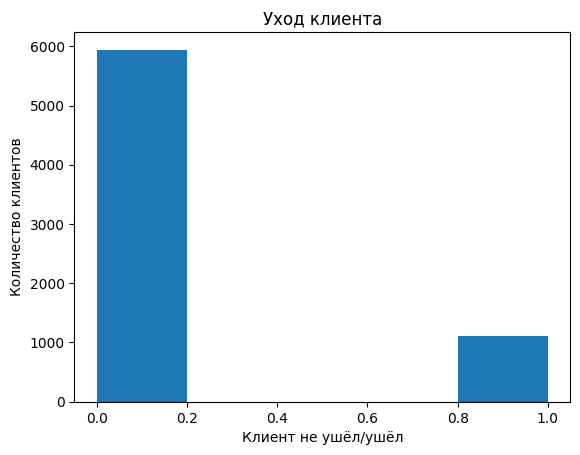

In [12]:
def histogram(data, title, xlabel, ylabel, bins=len(data)+1):
    plt.hist(data, bins=bins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
histogram(data_contract['ClientLeft'], 'Уход клиента', 'Клиент не ушёл/ушёл', 'Количество клиентов')

In [13]:
data_contract['ClientLeft'].value_counts()

0    5942
1    1101
Name: ClientLeft, dtype: int64

В целевом признаке наблюдается дисбаланс классов почти 6:1. Поскольку по условиям задачи нельзя использовать Upsampling/Downsampling, в подготовке данных для обучения воспользуемся методом `class_weight='balanced'`. Посмотрим соотношение в остальных признаках.

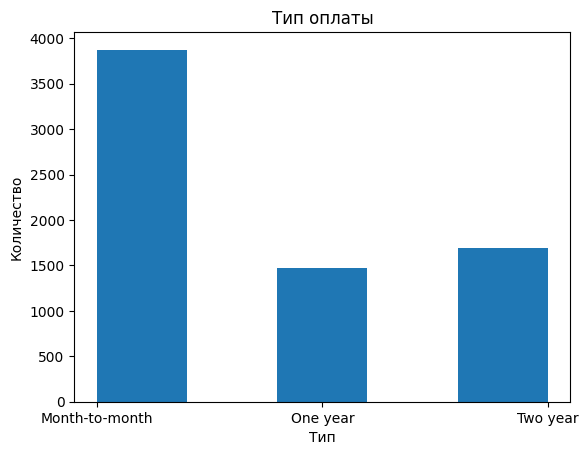

In [14]:
histogram(data_contract['Type'], 'Тип оплаты', 'Тип', 'Количество')

Клиенты оплачивают услуги ежемесячно, раз в год и раз в 2 года. Большинство - ежемесячно.

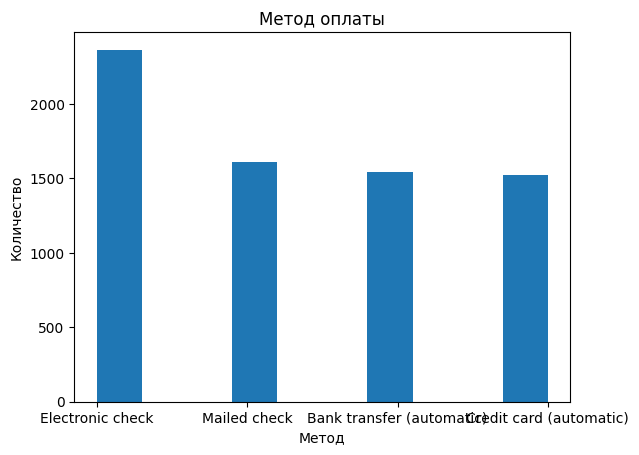

In [15]:
histogram(data_contract['PaymentMethod'], 'Метод оплаты', 'Метод', 'Количество', 10)

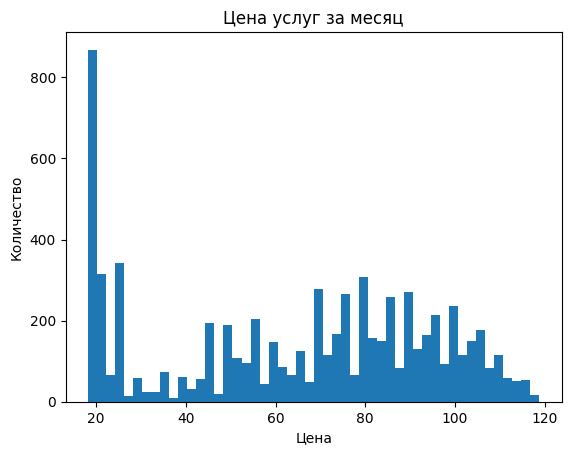

In [16]:
histogram(data_contract['MonthlyCharges'], 'Цена услуг за месяц', 'Цена', 'Количество', 50)

Интересно, что этот признак хранит много значений в широком диапазоне. Нужно посмотреть и статистическое распределение.

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

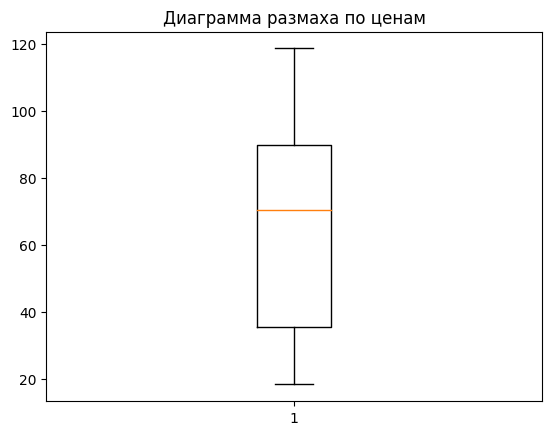

In [17]:
display(data_contract['MonthlyCharges'].describe())
plt.boxplot(data_contract['MonthlyCharges']);
plt.title('Диаграмма размаха по ценам');

В дальнейшем смотреть по одному столбцу не особо информативно, лучше объединить данные и изучить корреляцию. Поскольку мы уже преобразовали столбец customerID в индекс, можно использовать метод join.

In [18]:
data_all = data_contract.join(data_personal).join(data_internet).join(data_phone)
display(data_all.info())
data_all.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   object        
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7043 non-null   float64       
 7   ClientLeft        7043 non-null   int32         
 8   Gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   5517 non-null   object        
 13  OnlineSecurity    5517 non-null   object        
 14  OnlineBackup  

None

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ClientLeft,Gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,0,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,0,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,0,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60,0,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50,0,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


Пропуски в услугах - InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies и MultipleLines, - скорее всего, означают, что указанные услуги не подключены. Их можно заменить на No, для единообразия с уже существующими данными.

In [19]:
columns = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
           'StreamingMovies', 'MultipleLines']
for column in columns:
    data_all[column] = data_all[column].fillna('No')
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   object        
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7043 non-null   float64       
 7   ClientLeft        7043 non-null   int32         
 8   Gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   object        
 14  OnlineBackup  

Также заметно, что среди признаков есть как категориальные, так и численные. К категориальным впоследствии надо будет применить OneHotEncoding. Пока смотрим корреляцию численных признаков.

In [21]:
numeric = ['MonthlyCharges', 'TotalCharges']
categorical = [
    'Type',
    'PaperlessBilling',
    'PaymentMethod',
    'Gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'InternetService', 
    'OnlineSecurity', 
    'OnlineBackup', 
    'DeviceProtection', 
    'TechSupport', 
    'StreamingTV', 
    'StreamingMovies', 
    'MultipleLines',
    'ClientLeft'
]

In [22]:
data_all[numeric].corr()

,MonthlyCharges,TotalCharges
MonthlyCharges,1.00000,0.63044
TotalCharges,0.63044,1.00000


MonthlyCharges и TotalCharges в некоторой степени коррелируют между собой, но корреляцию с категориальными переменными тут не посмотришь, поэтому воспользуемся библиотекой Phik.

C:\Users\alner\AppData\Local\Temp\ipykernel_10780\1562440400.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


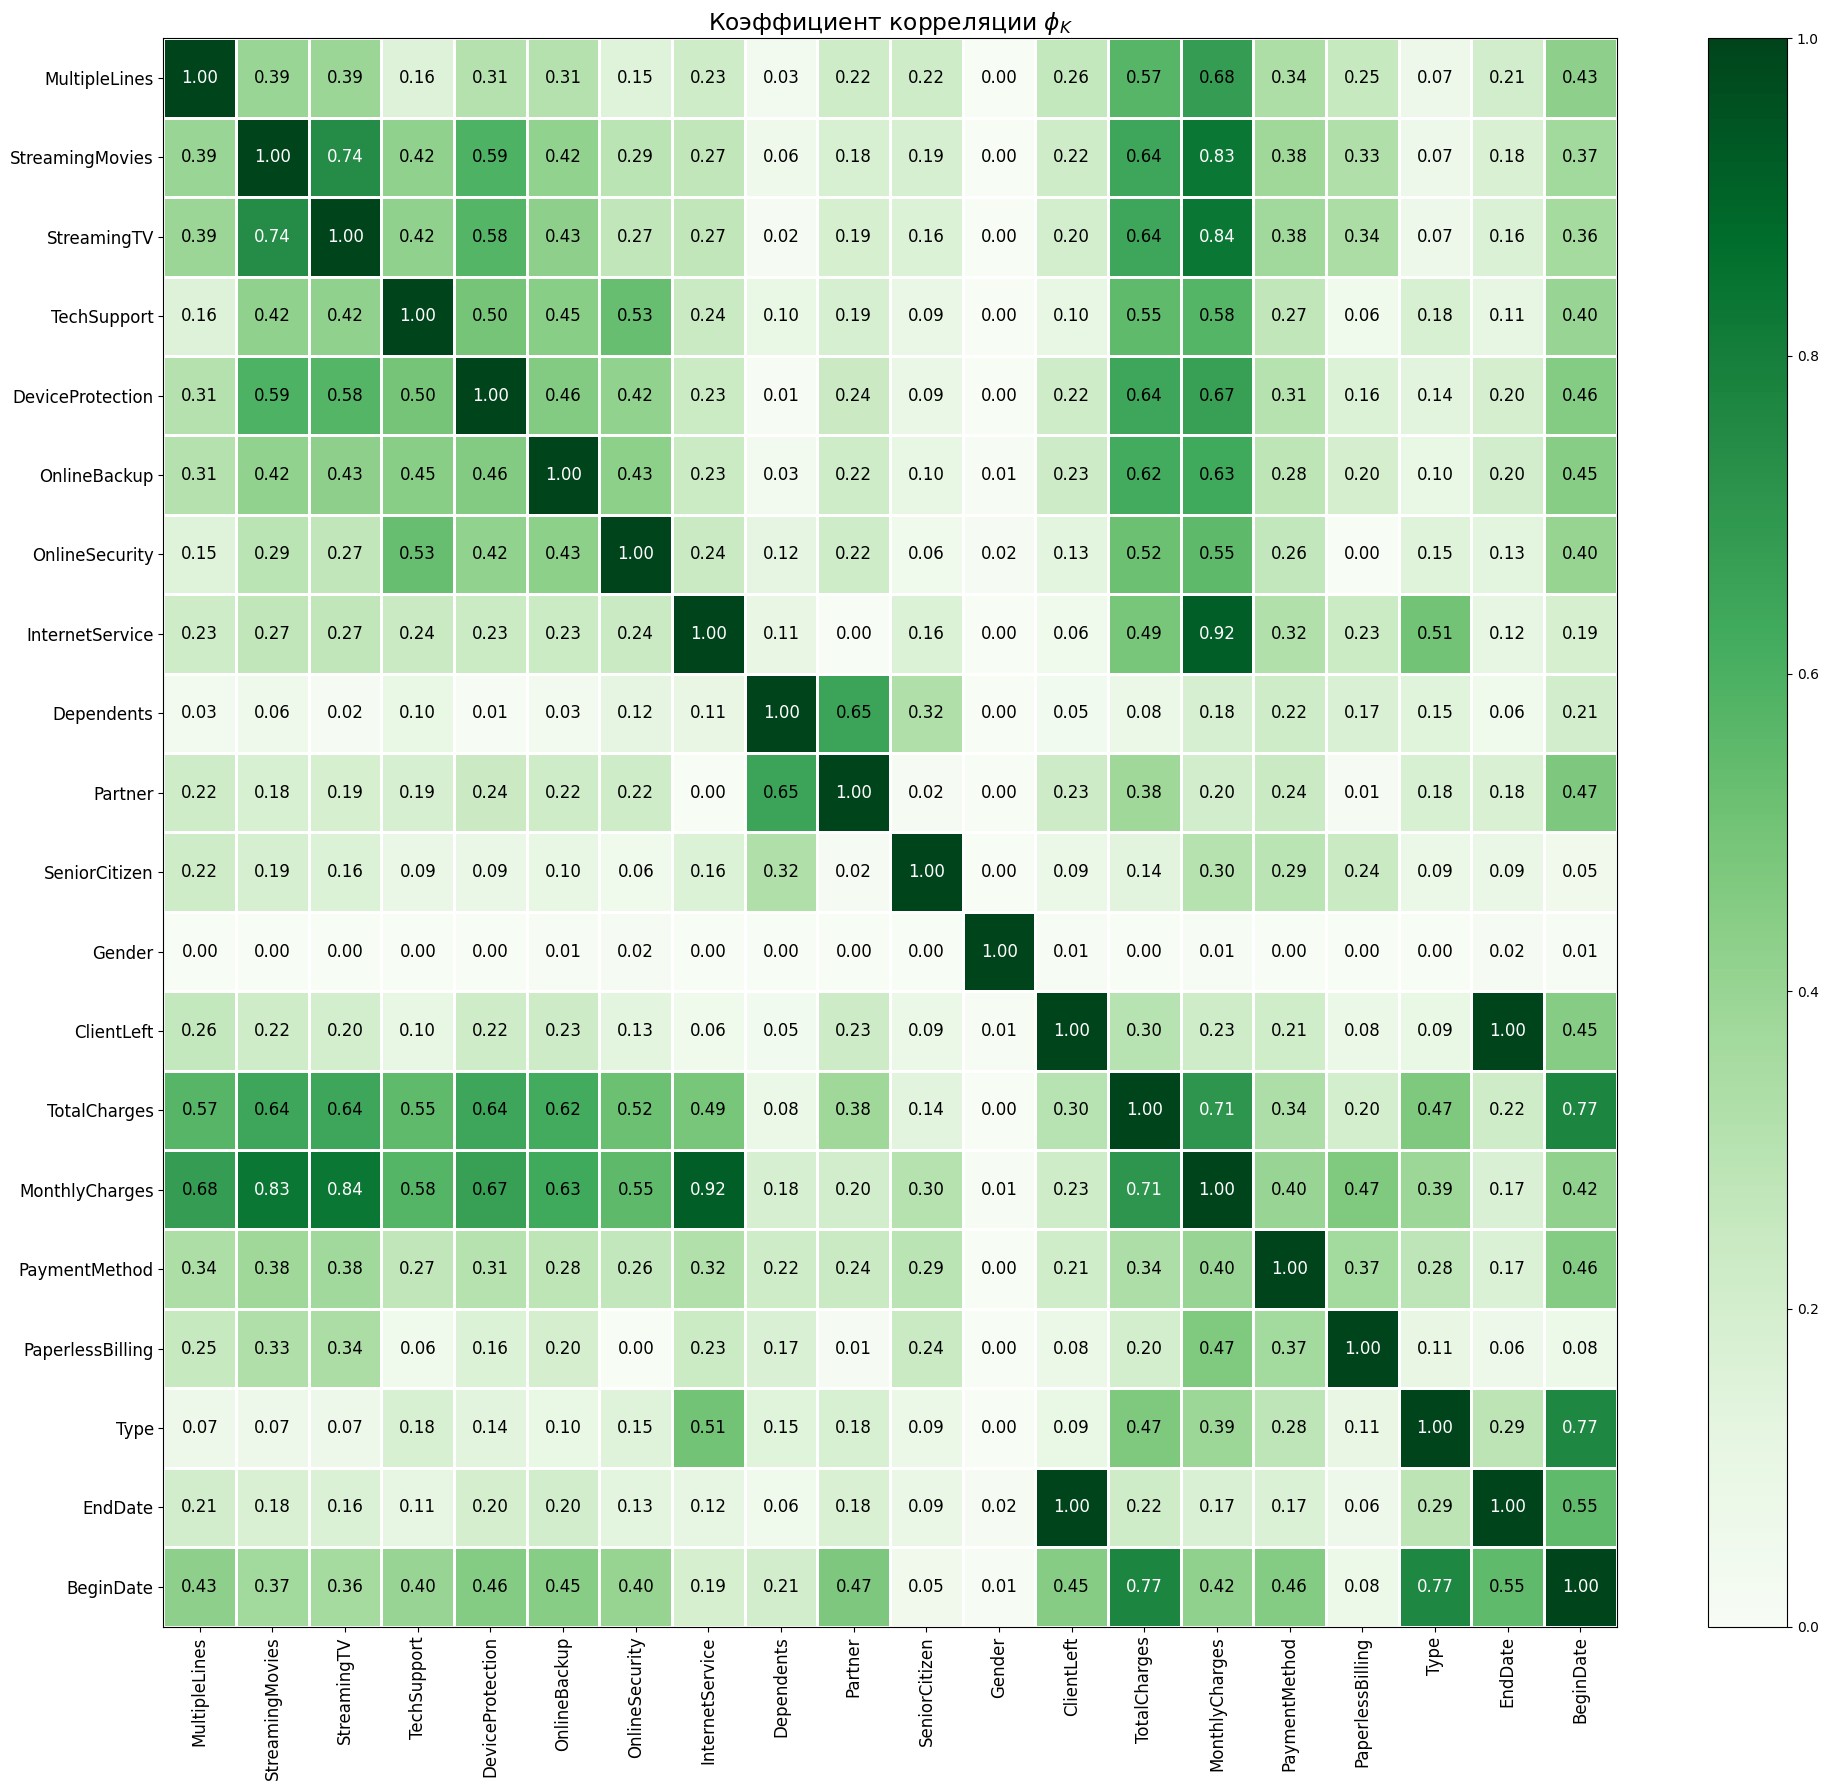

In [35]:
phik_overview = data_all.phik_matrix(interval_cols=numeric)

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"Коэффициент корреляции $\phi_K$", 
                        fontsize_factor=1.2, 
                        figsize=(20, 18))
plt.tight_layout()

Здесь заметно, что между многими признаками наблюдается корреляция:
* MonthlyCharges, TotalCharges и BeginDate (общая оплата зависит от тарифа и того, сколько дней клиент пользуется услугами провайдера)
* EndDate и ClientLeft - целевой признак
* MonthlyCharges и диапазон подключенных услуг (InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, MultipleLines) - стоимость тарифа зависит от того, что в него входит
* Type и BeginDate
* Partner и Dependents (наличие супруга - наличие детей)

C:\Users\alner\AppData\Local\Temp\ipykernel_10780\3562920478.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


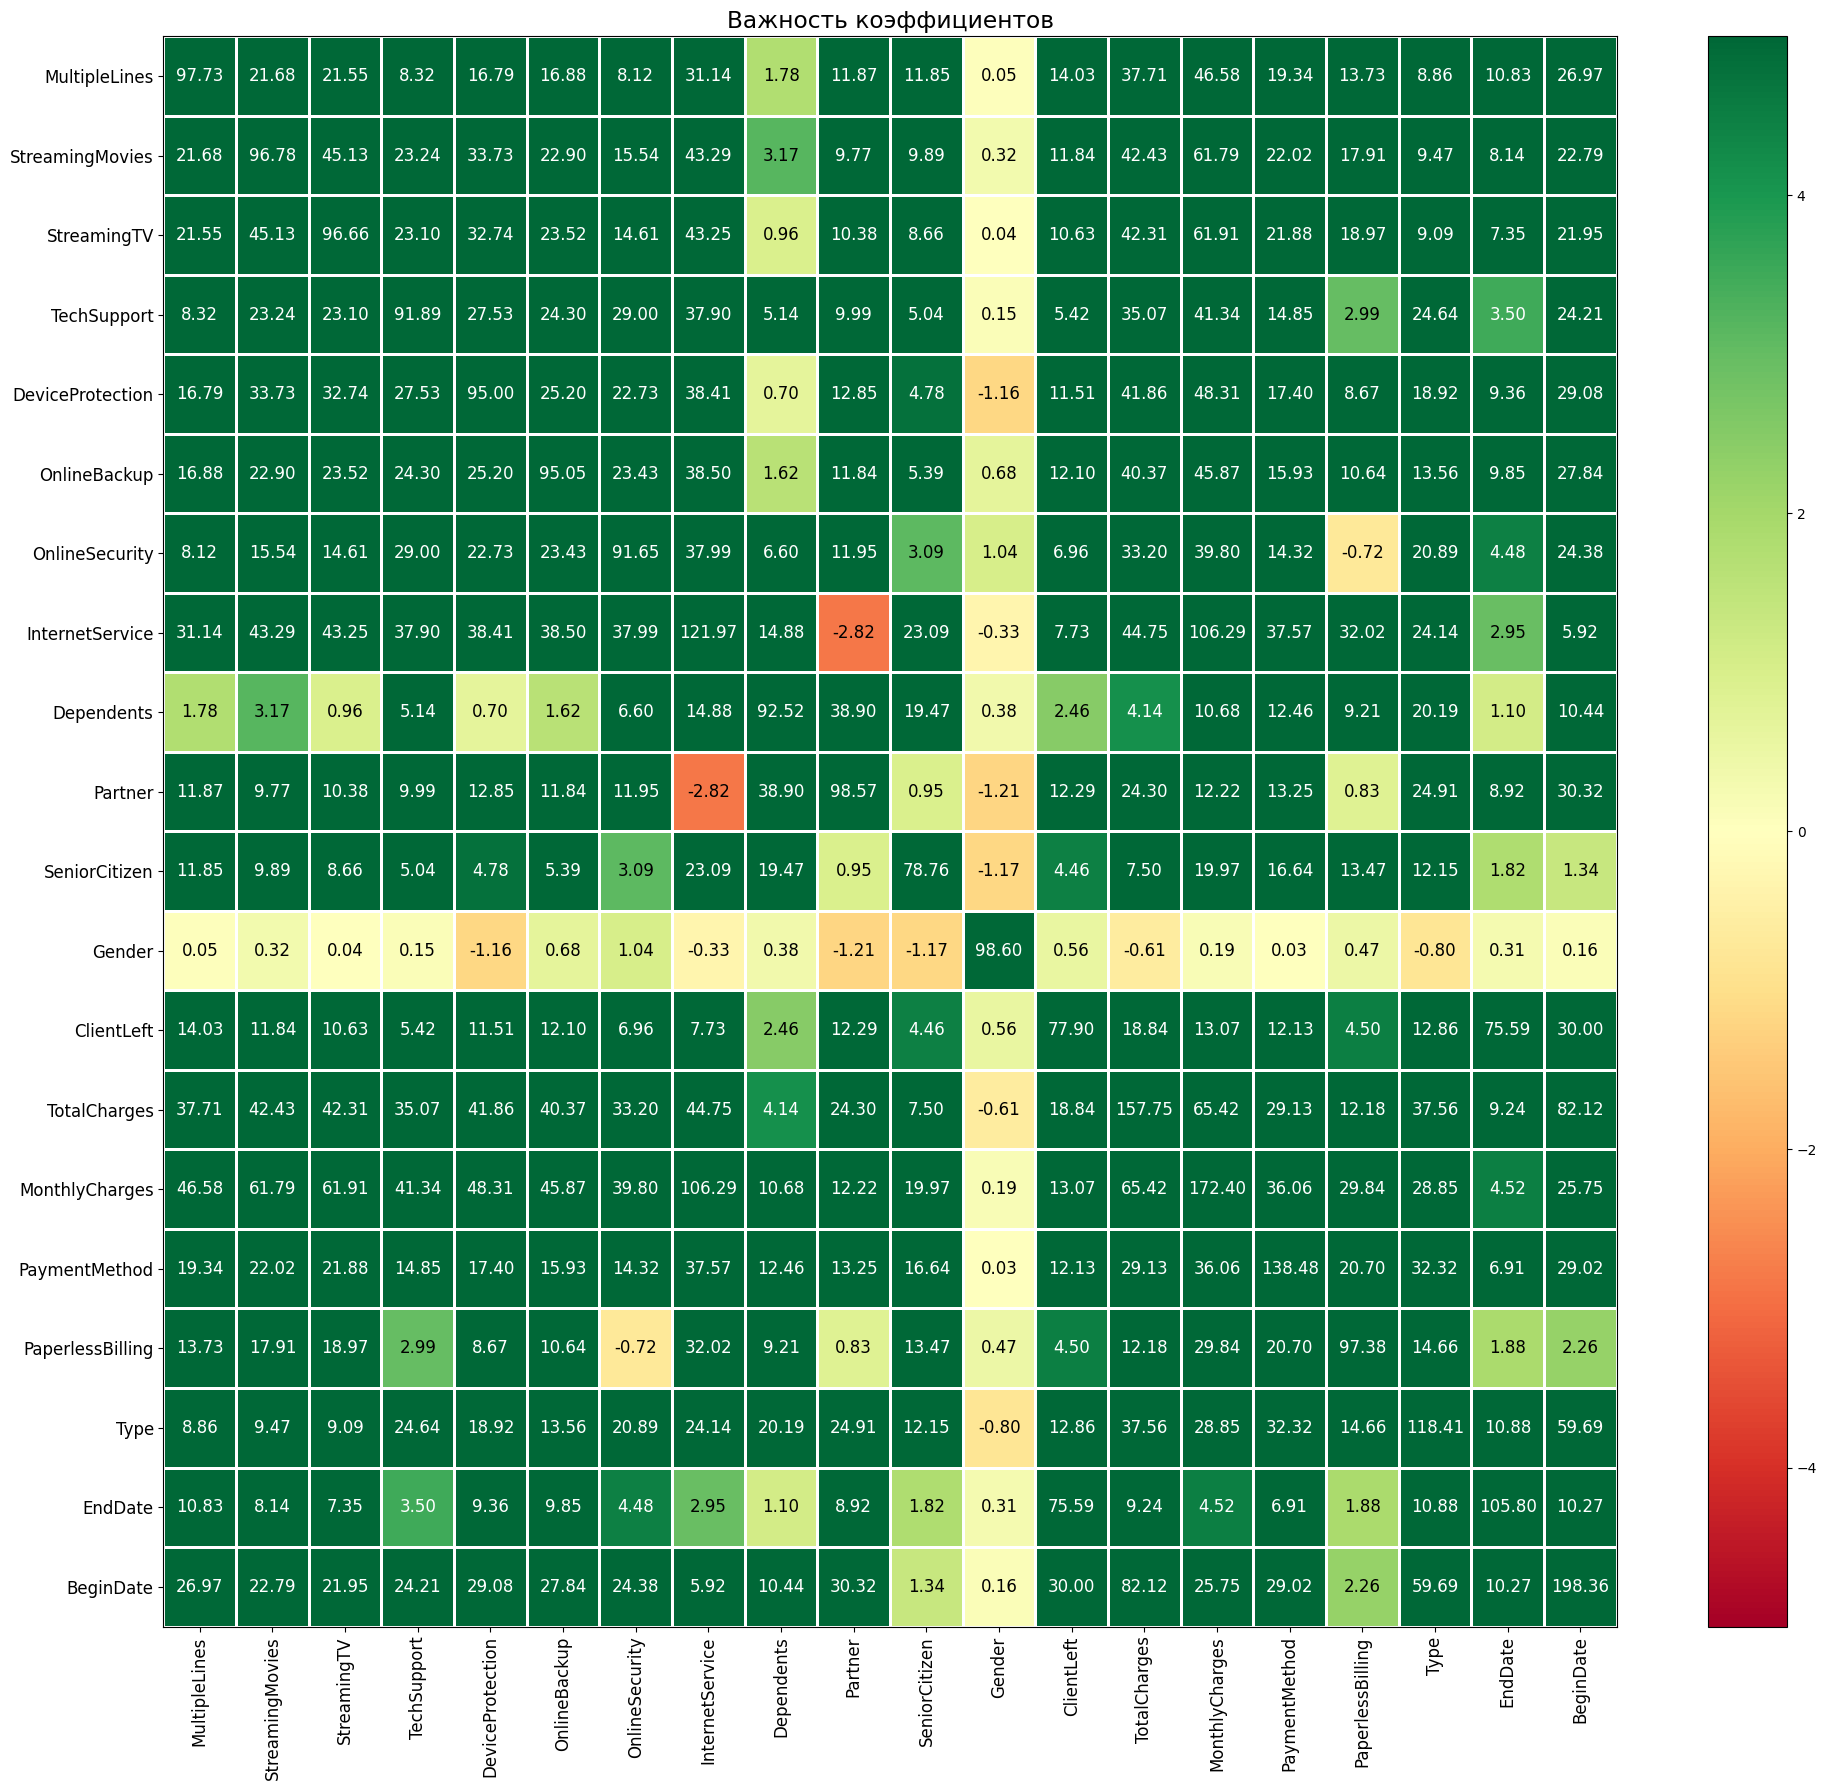

In [28]:
significance_overview = data_all.significance_matrix(interval_cols=numeric)
plot_correlation_matrix(significance_overview.fillna(0).values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=-5, vmax=5, title="Важность коэффициентов", 
                        usetex=False, fontsize_factor=1.2, figsize=(20, 18))
plt.tight_layout()

### Избавление от ненужных признаков
Здесь мы избавимся от признаков, засоряющих выборку или дающих мультиколлинеарность.

## Создание выборок, обучение моделей
### Разбиение на выборки, ОНЕ
Здесь мы разделим подготовленный датасет на обучающую и тестовую выборки, после разбиения категориальные признаки перекодируем по OneHotEncoding.
### Создание и обучение моделей
Создадим модели, с помощью кросс-валидации подберём лучшую.

## Тестирование финальной модели, выводы
### Проверка модели на тестовой выборке
Модель, которую мы в предыдущем разделе отобрали с помощью кросс-валидации, проверим на тестовой выборке.
### Выводы
Здесь подводим итоги, выводим результат (финальную ROC-кривую) и пишем вывод.

## Уточняющие вопросы
1. Понадобится ли нам в обучении длительность использования (которую можно посчитать, вычтя `BeginDate` из `EndDate`)? В теории, это может оказаться полезно - найти зависимость между тем, сколько времени клиент пользуется услугами провайдера, и его уходом. Если да, как её рассчитать для ещё действующих клиентов (у которых в `EndDate` стоит No)? Вычитать BeginDate из даты формирования датасета, или это будет неверным?
2. Признак Gender выдаёт близкую к нулю корреляцию со всеми остальными - это поможет или помешает? Я знаю, что сильная корреляция мешает, а про её полное отсутствие пока плохо понимаю.
3. Очень много коэффициентов определяются как статистически значимые в significance matrix - в их числе есть и "мультиколлинеарные" признаки. Нужно ли избавляться от тех, чья значимость определена как низкая?

## Цель проекта
Цель - научиться определять по косвенным признакам, уйдёт клиент от провайдера или нет, и если некий клиент собирается уйти - предложить ему "плюшки", которые смогут убедить его остаться (промокод, специальные условия тарифа и т.д.) Метрикой здесь будет служить ROC-кривая, показывающая ошибки:
* пользователю предложили спец.условия, но он не собирался уходить (false positive)
* пользователю ничего не предложили и он ушёл (false negative)